In [36]:
#DON'T USE MATPLOTLIB 3.5- REQUIRES 3.3 OR EARLIER TO RUN 

#I could use like 3 fewer packages here, this is just preference 
import numpy as np
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import geopandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from descartes.patch import PolygonPatch

In [21]:
#Get Polygon Shapes from natural Earth
shapename = "admin_0_countries"
Country_Shapes = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

#Put things in a nice dataframe
df = geopandas.read_file(Country_Shapes)

#Current List of Countries 
#To do- read in in from Google or Excel?
#The current implmentation can't handle regional split of US
Country_Subregion = ['Australia', 'New Zealand', 'Canada', 'United States of America', #(> 60ᵒ MLAT)', 'United States (< 60ᵒ MLAT)', 
                     'China', 'India', 'Japan', 'Russia', 'Finland', 'Norway', 'Sweden', 'France', 'Belgium', 'Germany', 
                     'Netherlands', 'Denmark', 'Italy', 'Switzerland', 'United Kingdom', 'Ireland', 'South Africa', 'Brazil']

#Copied from Risk and Resiliency Table 
#Make numerical?
#Add Countries?
Resilience_Assessment_Grid = ['low', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low',
                              'low', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low']

#We need to fix this to not be all low... pretty boring table 
Resilience_Assessment_Aviation = []

#Dummy check the lengths are the same 
print(len(Country_Subregion), len(Resilience_Assessment_Grid))

#assign to dictionaries
Country_Dictionary = {Country_Subregion[i]: Resilience_Assessment_Grid[i] for i in range(len(Resilience_Assessment_Grid))}



22 22


In [22]:
#Here is a nice a color coding for the countries 
def color_country(country_dict, country):
    ans = (0.9375, 0.9375, 0.859375)
    if country_dict[country] == 'high':
        ans = '#D55E00'
    elif country_dict[country] == 'low':
        ans = '#009E73'
    else:
        ans = 'grey'
    
    #return {'facecolor': facecolor, 'edgecolor': 'black'}
    return ans

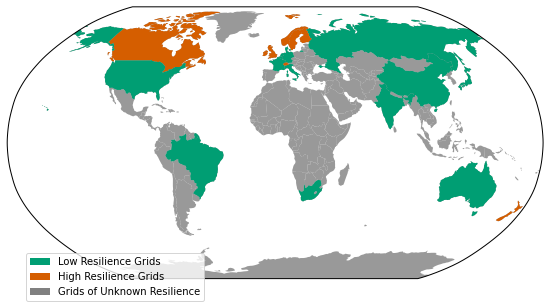

In [25]:
#Plotting stuff 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(), frameon = False)
ax.set_global()

#Plot all countries background    
ax.add_geometries(shpreader.Reader(Country_Shapes).geometries(), ccrs.PlateCarree(), alpha = 0.8, facecolor = "grey")

#Plot colored countries
for Country in Country_Subregion:
    poly = [df.loc[df['ADMIN'] == Country]['geometry'].values[0]]
    ax.add_geometries(poly, ccrs.PlateCarree(), facecolor=color_country(Country_Dictionary, Country))


#Make a legend
high_resilience = mpatches.Rectangle((0, 0), 1, 1, facecolor="#D55E00")
low_resilience = mpatches.Rectangle((0, 0), 1, 1, facecolor="#009E73")
unknown_resilience = mpatches.Rectangle((0, 0), 1, 1, facecolor="grey")
labels = ['Low Resilience Grids',
              'High Resilience Grids', 'Grids of Unknown Resilience']
ax.legend([low_resilience, high_resilience, unknown_resilience], labels,
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)


plt.savefig("Cool Grid Resilience Map.png")

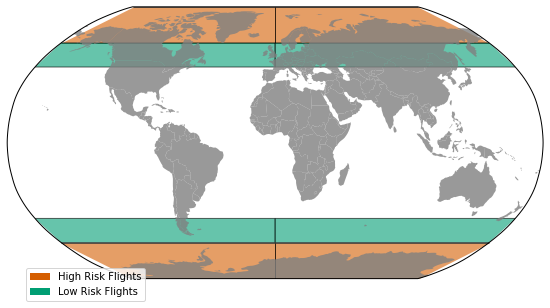

In [63]:
#print(df['ADMIN'][100:150])

#Repeat the same stuff as before
#I could put this in a function 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(), frameon = False)
ax.set_global()

#Plot all countries background    
ax.add_geometries(shpreader.Reader(Country_Shapes).geometries(), ccrs.PlateCarree(), alpha = 0.8, facecolor = "grey")

#Make wrap around polygons and append them to a list of polygons 
#This looks ugly to avoid date line issues
#There has to be a better way to do this 
#To do- make a variable for these color codes? Add more color codes?
poly_list = []
high_risk_poly = PolygonPatch(Polygon([(180, 60), (180, 90), (360, 90), (360, 60)]), facecolor = '#D55E00',
                              alpha = 0.6, transform = ccrs.PlateCarree())
poly_list = np.append(poly_list, high_risk_poly)
high_risk_poly_2 = PolygonPatch(Polygon([(0, 60), (0, 90), (180, 90), (180, 60)]), facecolor = '#D55E00',
                              alpha = 0.6, transform = ccrs.PlateCarree())
poly_list = np.append(poly_list, high_risk_poly_2)


high_risk_poly_south = PolygonPatch(Polygon([(180, -60), (180, -90), (360, -90), (360, -60)]),  facecolor = '#D55E00', 
                                    alpha = 0.6, transform = ccrs.PlateCarree())
poly_list = np.append(poly_list, high_risk_poly_south)
high_risk_poly_south_2 = PolygonPatch(Polygon([(0, -60), (0, -90), (180, -90), (180, -60)]),  facecolor = '#D55E00', 
                                    alpha = 0.6, transform = ccrs.PlateCarree())
poly_list = np.append(poly_list, high_risk_poly_south_2)


low_risk_poly = PolygonPatch(Polygon([(180, 45), (180, 60), (360, 60), (360, 45)]), facecolor = '#009E73', 
                             alpha = 0.6, transform = ccrs.PlateCarree())
poly_list = np.append(poly_list, low_risk_poly)
low_risk_poly_2 = PolygonPatch(Polygon([(0, 45), (0, 60), (180, 60), (180, 45)]), facecolor = '#009E73', 
                             alpha = 0.6, transform = ccrs.PlateCarree())
poly_list = np.append(poly_list, low_risk_poly_2)


low_risk_poly_south = PolygonPatch(Polygon([(180, -45), (180, -60), (360, -60), (360, -45)]), facecolor = '#009E73', 
                                   alpha = 0.6, transform = ccrs.PlateCarree())
poly_list = np.append(poly_list, low_risk_poly_south)
low_risk_poly_south_2 = PolygonPatch(Polygon([(0, -45), (0, -60), (180, -60), (180, -45)]), facecolor = '#009E73', 
                                   alpha = 0.6, transform = ccrs.PlateCarree())
poly_list = np.append(poly_list, low_risk_poly_south_2)


#ax.add_geometries(poly_list, ccrs.PlateCarree()) #, ccrs.PlateCarree(), facecolor='#D55E00')

for poly in poly_list:
    ax.add_patch(poly) #, ccrs.PlateCarree())
#ax.add_geometries(low_risk_poly, ccrs.PlateCarree(), facecolor='#009E73')
#ax.add_geometries(high_risk_poly_south, ccrs.PlateCarree(), facecolor='#D55E00')
#ax.add_geometries(low_risk_poly_south, ccrs.PlateCarree(), facecolor='#009E73')
#ax.plot(global_poly_lon, y, marker='o', transform=ccrs.Robinson())
#ax.fill(global_poly_lon, y, color='#D55E00', transform=ccrs.Robinson(), alpha=0.4)
#ax.plot(global_poly_lon, y, marker='o', transform=ccrs.Robinson())
#ax.fill(global_poly_lon, y, color='#009E73', transform=ccrs.Robinson(), alpha=0.4)

high_risk = mpatches.Rectangle((0, 0), 1, 1, facecolor="#D55E00")
low_risk = mpatches.Rectangle((0, 0), 1, 1, facecolor="#009E73")
#unknown_resilience = mpatches.Rectangle((0, 0), 1, 1, facecolor="grey")
risk_labels = ['High Risk Flights',
              'Low Risk Flights']
ax.legend([high_risk, low_risk], risk_labels,
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)


plt.savefig("Cool Aviation Risk Map.png")

In [8]:
#To do- Make interactive map with FOLIUM
#SEE https://python-visualization.github.io/folium/quickstart.html

In [52]:
PolygonPatch?